In [1]:
import pandas as pd
import numpy as np
import collections
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import dateutil.parser as parser
import seaborn as sns
# including pandas for opening and creating dataframes from csv files
# numpy is used for type casting to int64 from float64 in this program
#matplot lib for plotting graphs and pie charts
d1 = pd.read_csv("/home/vikmachine/Death.csv", error_bad_lines=False)
d1

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8
5,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Nonmetropolitan,200.0,768506.0,103.0,97.0,48.5
6,2005,Cancer,Alabama,AL,4,0-49,Floating,All,756.0,3148377.0,451.0,305.0,40.3
7,2005,Cancer,Alabama,AL,4,0-49,Floating,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
8,2005,Cancer,Alabama,AL,4,0-49,Floating,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
9,2005,Cancer,Alabama,AL,4,0-54,2005 Fixed,All,1346.0,3463216.0,784.0,562.0,41.8


In [2]:
d1['Cause of Death'].value_counts()

Unintentional Injury                 41184
Heart Disease                        41184
Cancer                               41184
Stroke                               41184
Chronic Lower Respiratory Disease    41184
Name: Cause of Death, dtype: int64

In [3]:
d2=d1[['Year', 'Cause of Death','State','Age Range','Locality','Population', 'Observed Deaths']].drop_duplicates().dropna().sort_index()
d2.columns = ['Year', 'Cause_of_Death','State','Age_Range','Locality','Population', 'Deaths']
d2 = d2[(d2.Locality == 'All')] 
d2["Age_Range"] = d2["Age_Range"].str.replace("0-", "").astype(int)
d2 = d2[(d2.State == 'United States')]
d2 = d2[(d2.Cause_of_Death == 'Cancer')]
#d2['Percentage_Death'] = (d2['Deaths']*1000/d2['Population'])
#d2=d2.groupby(level=0).diff().fillna(d2).reset_index()
#d2['Death_sep'] = d2.Deaths[::-1].cumsum()
#d3 = d3[(d3.Age_Range == 84)]
d2 = d2[(d2.Year== 2006)]
d2['Death_sep']=d2['Deaths'] - d2['Deaths'].shift()
d2=d2.reset_index()
d2['Death_sep'].fillna(d2.at[0, 'Deaths'], inplace=True)
d2['Percentage_Death'] = (d2['Death_sep']*1000/d2['Population'])
d2.sort_values(by=['Cause_of_Death','Year','Age_Range'])
r=1
#d2["CY"] = d2["Cause_of_Death"]+str(' --> ') + d2["Year"].map(str)

bars1 = d2['Age_Range'].tolist()
bars2 = d2['Year'].tolist()
bars3 = d2['Cause_of_Death'].tolist()
bars4 = d2['Percentage_Death'].tolist()
r=r-(1/16)
#plt.plot(bars1,bars4, color=[r, 0.0, 0.0],label='Cancer')
d2

,index,Year,Cause_of_Death,State,Age_Range,Locality,Population,Deaths,Death_sep,Percentage_Death
0,21888,2006,Cancer,United States,49,All,208714819.0,39751.0,39751.0,0.190456
1,21897,2006,Cancer,United States,54,All,229285692.0,70911.0,31160.0,0.135900
2,21906,2006,Cancer,United States,59,All,247682552.0,116968.0,46057.0,0.185952
3,21915,2006,Cancer,United States,64,All,261215805.0,172365.0,55397.0,0.212074
4,21924,2006,Cancer,United States,69,All,271769006.0,236185.0,63820.0,0.234832
5,21933,2006,Cancer,United States,74,All,280418832.0,309919.0,73734.0,0.262942
6,21942,2006,Cancer,United States,79,All,287865866.0,394422.0,84503.0,0.293550
7,21951,2006,Cancer,United States,84,All,293513983.0,474808.0,80386.0,0.273875


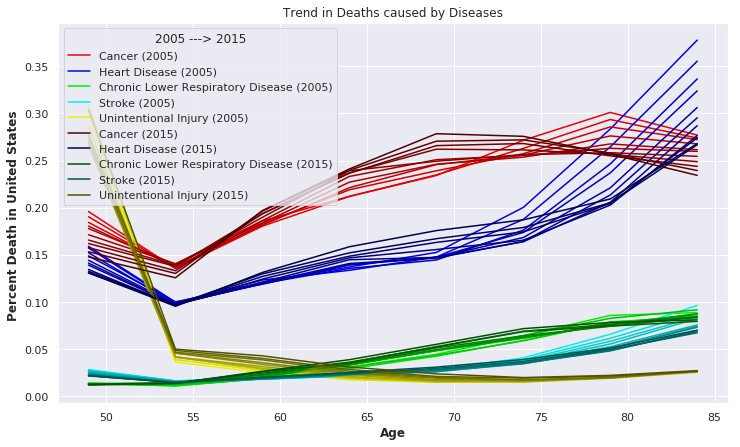

In [4]:
sns.set(rc={'figure.figsize':(12,7)}) 
r=g=b=c=y=k=m=1
plt.figure()
for i in range(2005,2016):    
    d2=d1[['Year', 'Cause of Death','State','Age Range','Locality','Population', 'Observed Deaths']].drop_duplicates().dropna().sort_index()
    d2.columns = ['Year', 'Cause_of_Death','State','Age_Range','Locality','Population', 'Deaths']
    d2 = d2[(d2.Locality == 'All')] 
    d2["Age_Range"] = d2["Age_Range"].str.replace("0-", "").astype(int)
    d2 = d2[(d2.State == 'United States')]
    d2 = d2[(d2.Cause_of_Death == 'Cancer')]
    d2 = d2[(d2.Year== i)]
    d2['Death_sep']=d2['Deaths'] - d2['Deaths'].shift()
    d2=d2.reset_index()
    d2['Death_sep'].fillna(d2.at[0, 'Deaths'], inplace=True)
    
    d2['Percentage_Death'] = (d2['Death_sep']*1000/d2['Population'])
    d2.sort_values(by=['Cause_of_Death','Year','Age_Range'])
    d2 = d2[(d2.Cause_of_Death == 'Cancer')]
    bars1 = d2['Age_Range'].tolist()
    bars2 = d2['Year'].tolist()
    bars3 = d2['Cause_of_Death'].tolist()
    bars4 = d2['Percentage_Death'].tolist()
    r=r-(1/16)
    if i==2005:
        plt.plot(bars1,bars4, color=[r, 0, 0],label='Cancer (2005)')
    elif i==2015:
        plt.plot(bars1,bars4, color=[r, 0, 0],label='Cancer (2015)')
    else:
        plt.plot(bars1,bars4, color=[r, 0, 0])

    d3=d1[['Year', 'Cause of Death','State','Age Range','Locality','Population', 'Observed Deaths']].drop_duplicates().dropna().sort_index()
    d3.columns = ['Year', 'Cause_of_Death','State','Age_Range','Locality','Population', 'Deaths']
    d3 = d3[(d3.Locality == 'All')] 
    d3["Age_Range"] = d3["Age_Range"].str.replace("0-", "").astype(int)
    d3 = d3[(d3.State == 'United States')]
    d3 = d3[(d3.Cause_of_Death == 'Heart Disease')]
    d3 = d3[(d3.Year== i)]
    d3['Death_sep']=d3['Deaths'] - d3['Deaths'].shift()
    d3=d3.reset_index()
    d3['Death_sep'].fillna(d3.at[0, 'Deaths'], inplace=True)
    
    d3['Percentage_Death'] = (d3['Death_sep']*1000/d3['Population'])
    d3.sort_values(by=['Cause_of_Death','Year','Age_Range'])
    bars1 = d3['Age_Range'].tolist()
    bars2 = d3['Year'].tolist()
    bars3 = d3['Cause_of_Death'].tolist()
    bars4 = d3['Percentage_Death'].tolist()
    g=g-(1/16)
    if i==2005:
        plt.plot(bars1,bars4, color=[0, 0, g],label='Heart Disease (2005)')
    elif i==2015:
        plt.plot(bars1,bars4, color=[0, 0, g],label='Heart Disease (2015)')
    else:
        plt.plot(bars1,bars4, color=[0, 0, g])

    d4=d1[['Year', 'Cause of Death','State','Age Range','Locality','Population', 'Observed Deaths']].drop_duplicates().dropna().sort_index()
    d4.columns = ['Year', 'Cause_of_Death','State','Age_Range','Locality','Population', 'Deaths']
    d4 = d4[(d4.Locality == 'All')] 
    d4["Age_Range"] = d4["Age_Range"].str.replace("0-", "").astype(int)
    d4 = d4[(d4.State == 'United States')]
    d4=d4.sort_values(by=['Cause_of_Death','Year','Age_Range'])
    d4 = d4[(d4.Cause_of_Death == 'Chronic Lower Respiratory Disease')]
    d4 = d4[(d4.Year== i)]
    d4['Death_sep']=d4['Deaths'] - d4['Deaths'].shift()
    d4=d4.reset_index()
    d4['Death_sep'].fillna(d4.at[0, 'Deaths'], inplace=True)
    
    d4['Percentage_Death'] = (d4['Death_sep']*1000/d4['Population'])
    d4.sort_values(by=['Cause_of_Death','Year','Age_Range'])
    bars1 = d4['Age_Range'].tolist()
    bars2 = d4['Year'].tolist()
    bars3 = d4['Cause_of_Death'].tolist()
    bars4 = d4['Percentage_Death'].tolist()
    b=b-(1/16)
    if i==2005:
        plt.plot(bars1,bars4, color=[0, b, 0],label='Chronic Lower Respiratory Disease (2005)')
    elif i==2015:
        plt.plot(bars1,bars4, color=[0, b, 0],label='Chronic Lower Respiratory Disease (2015)')
    else:
        plt.plot(bars1,bars4, color=[0, b, 0])

    d5=d1[['Year', 'Cause of Death','State','Age Range','Locality','Population', 'Observed Deaths']].drop_duplicates().dropna().sort_index()
    d5.columns = ['Year', 'Cause_of_Death','State','Age_Range','Locality','Population', 'Deaths']
    d5 = d5[(d5.Locality == 'All')] 
    d5["Age_Range"] = d5["Age_Range"].str.replace("0-", "").astype(int)
    d5 = d5[(d5.State == 'United States')]
    d5 = d5[(d5.Cause_of_Death == 'Stroke')]
    d5 = d5[(d5.Year== i)]
    d5['Death_sep']=d5['Deaths'] - d5['Deaths'].shift()
    d5=d5.reset_index()
    d5['Death_sep'].fillna(d5.at[0, 'Deaths'], inplace=True)

    d5['Percentage_Death'] = (d5['Death_sep']*1000/d5['Population'])
    d5.sort_values(by=['Cause_of_Death','Year','Age_Range'])
    bars1 = d5['Age_Range'].tolist()
    bars2 = d5['Year'].tolist()
    bars3 = d5['Cause_of_Death'].tolist()
    bars4 = d5['Percentage_Death'].tolist()
    k=k-(1/16)
    m=m-(1/16)
    if i==2005:
        plt.plot(bars1,bars4, color=[0, k, m],label='Stroke (2005)')
    elif i==2015:
        plt.plot(bars1,bars4, color=[0, k, m],label='Stroke (2015)')
    else:
        plt.plot(bars1,bars4, color=[0, k, m])

    d6=d1[['Year', 'Cause of Death','State','Age Range','Locality','Population', 'Observed Deaths']].drop_duplicates().dropna().sort_index()
    d6.columns = ['Year', 'Cause_of_Death','State','Age_Range','Locality','Population', 'Deaths']
    d6 = d6[(d6.Locality == 'All')] 
    d6["Age_Range"] = d6["Age_Range"].str.replace("0-", "").astype(int)
    d6 = d6[(d6.State == 'United States')]
    d6 = d6[(d6.Cause_of_Death == 'Unintentional Injury')]
    d6 = d6[(d6.Year== i)]
    d6['Death_sep']=d6['Deaths'] - d6['Deaths'].shift()
    d6=d6.reset_index()
    d6['Death_sep'].fillna(d6.at[0, 'Deaths'], inplace=True)
    
    d6['Percentage_Death'] = (d6['Death_sep']*1000/d6['Population'])
    d6.sort_values(by=['Cause_of_Death','Year','Age_Range'])
    bars1 = d6['Age_Range'].tolist()
    bars2 = d6['Year'].tolist()
    bars3 = d6['Cause_of_Death'].tolist()
    bars4 = d6['Percentage_Death'].tolist()
    c=c-(1/16)
    y=y-(1/16)
    if i==2005:
        plt.plot(bars1,bars4, color=[c, y, 0.0],label='Unintentional Injury (2005)')
    elif i==2015:
        plt.plot(bars1,bars4, color=[c, y, 0.0],label='Unintentional Injury (2015)')
    else:
        plt.plot(bars1,bars4, color=[c, y, 0.0])
    #plt.xticks(r1, ['Cancer','Heart Disease','Chronic Lower Respiratory Disease','Stroke','Unintentional Injury'])

    
plt.legend(title="2005 ---> 2015",loc='best')
plt.title('Trend in Deaths caused by Diseases')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Percent Death in United States ',fontweight='bold')
plt.savefig("file.png", bbox_inches="tight")

In [5]:
d7=d1[['Year', 'Cause of Death','State','Age Range','Locality','Population', 'Observed Deaths']].drop_duplicates().dropna().sort_index()
d7.columns = ['Year', 'Cause_of_Death','State','Age_Range','Locality','Population', 'Deaths']
d7 = d7[(d7.Age_Range == '0-84')]
d7 = d7[(d7.Locality == 'All')]
d7 = d7[(d7.Year == 2015)] 
d7 = d7.sort_values(by='Population', ascending=False).drop_duplicates().reset_index()
d7 = d7.head(105)
d7 = d7.tail(100)
d7

,index,Year,Cause_of_Death,State,Age_Range,Locality,Population,Deaths
5,195068,2015,Heart Disease,California,0-84,All,38437041.0,34837.0
6,187562,2015,Cancer,California,0-84,All,38437041.0,48075.0
7,198812,2015,Stroke,California,0-84,All,38437041.0,8081.0
8,202528,2015,Unintentional Injury,California,0-84,All,38437041.0,10988.0
9,191298,2015,Chronic Lower Respiratory Disease,California,0-84,All,38437041.0,8802.0
10,197880,2015,Heart Disease,Texas,0-84,All,27094675.0,29179.0
11,194128,2015,Chronic Lower Respiratory Disease,Texas,0-84,All,27094675.0,7532.0
12,190359,2015,Cancer,Texas,0-84,All,27094675.0,33560.0
13,201592,2015,Stroke,Texas,0-84,All,27094675.0,6549.0
14,205335,2015,Unintentional Injury,Texas,0-84,All,27094675.0,8883.0


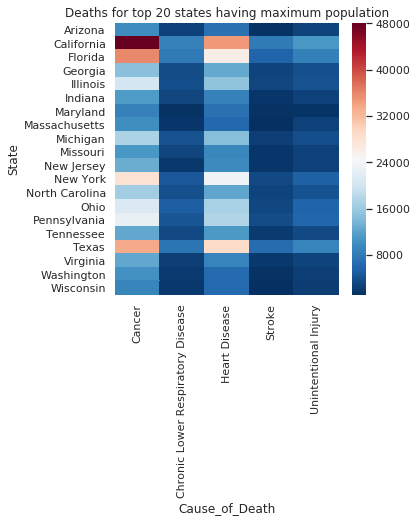

In [6]:
d8 = d7.pivot("State","Cause_of_Death", "Deaths")
sns.set(rc={'figure.figsize':(5,5)}) 
ax = sns.heatmap(d8,cmap="RdBu_r")
ax.set_title("Deaths for top 20 states having maximum population")
plt.savefig("file1.png", bbox_inches="tight")